In [2]:
%store -r df

df.head()

,datetime,location,bsnApIfNoOfUsers,bsnAPIfDot11TransmittedFragmentCount,bsnAPIfDot11MulticastTransmittedFrameCount,bsnAPIfDot11RetryCount,bsnAPIfDot11MultipleRetryCount,bsnAPIfDot11FrameDuplicateCount,bsnAPIfDot11RTSSuccessCount,bsnAPIfDot11RTSFailureCount,...,bsnAPIfDot11MulticastReceivedFrameCount,bsnAPIfDot11FCSErrorCount,bsnAPIfDot11TransmittedFrameCount,bsnAPIfDot11WEPUndecryptableCount,bsnAPIfDot11FailedCount,bsnAPIfLoadRxUtilization,bsnAPIfLoadTxUtilization,bsnAPIfLoadChannelUtilization,bsnAPIfLoadNumOfClients,bsnAPIfPoorSNRClients
0,2015-01-01--00-00,AP-A10-5,0,6532826,355396,1666379,366814,81774,243070,526207,...,870978,431671759,214599205,5,2723435,0,0,0,0,0
1,2015-01-01--00-00,AP-A10-2,0,22747903,357512,3793748,667720,319500,590177,1347650,...,1011316,380220567,231300303,986,9645856,0,0,0,0,0
2,2015-01-01--00-00,Ustka-p1,0,1950,199900,0,0,0,0,0,...,68939,6188,116856285,0,1759,0,0,0,0,0
3,2015-01-01--00-00,AP-C7-1cdf.0fac.9104,0,34592765,357116,9998923,2156216,869887,1780188,2797429,...,497513,93569555,243628923,36,6939857,0,0,0,0,0
4,2015-01-01--00-00,C6-biblioteka,0,68720934,366074,18706657,3103553,1006329,2816447,6741983,...,891345,460786107,278925731,2321,8446559,0,0,1,1,1


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
X_data = []
Y_data = []

for i in range(29):
    day = "2015-01-{:02d}-".format(i+1)
    dayData = df.loc[df["datetime"].str.startswith(day)]
    dayValue = dayData.sum()["bsnApIfNoOfUsers"]
    dayTime = day.replace("-", "")
    X_data.append([int(dayTime)])
    Y_data.append([dayValue])


[['20150101'], ['20150102'], ['20150103'], ['20150104'], ['20150105'], ['20150106'], ['20150107'], ['20150108'], ['20150109'], ['20150110'], ['20150111'], ['20150112'], ['20150113'], ['20150114'], ['20150115'], ['20150116'], ['20150117'], ['20150118'], ['20150119'], ['20150120'], ['20150121'], ['20150122'], ['20150123'], ['20150124'], ['20150125'], ['20150126'], ['20150127'], ['20150128'], ['20150129']]


In [9]:
print("dates: ", X_data)
print("values: ", Y_data)

dates:  [['20150101'], ['20150102'], ['20150103'], ['20150104'], ['20150105'], ['20150106'], ['20150107'], ['20150108'], ['20150109'], ['20150110'], ['20150111'], ['20150112'], ['20150113'], ['20150114'], ['20150115'], ['20150116'], ['20150117'], ['20150118'], ['20150119'], ['20150120'], ['20150121'], ['20150122'], ['20150123'], ['20150124'], ['20150125'], ['20150126'], ['20150127'], ['20150128'], ['20150129']]
values:  [[13206], [12562], [11145], [10180], [27926], [11933], [181396], [190127], [170343], [92472], [62945], [200156], [195618], [206253], [210226], [158550], [53158], [37167], [207300], [200353], [209189], [200548], [165011], [83804], [63625], [204317], [192180], [192015], [187023]]


In [24]:
#xses = [[int(a[0])] for a in X_data]
X = np.array(X_data)
Y = np.array(Y_data)
print(Y)

[[ 13206]
 [ 12562]
 [ 11145]
 [ 10180]
 [ 27926]
 [ 11933]
 [181396]
 [190127]
 [170343]
 [ 92472]
 [ 62945]
 [200156]
 [195618]
 [206253]
 [210226]
 [158550]
 [ 53158]
 [ 37167]
 [207300]
 [200353]
 [209189]
 [200548]
 [165011]
 [ 83804]
 [ 63625]
 [204317]
 [192180]
 [192015]
 [187023]]


In [21]:
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

array([[5196.18768473]])

In [23]:
reg.predict(np.array([[20150129]]))

array([[202082.07585144]])

In [43]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [45]:
X_flattened = flatten(X_data)
Y_flattened = flatten(Y_data)

In [44]:
flatten(Y_data)

[13206,
 12562,
 11145,
 10180,
 27926,
 11933,
 181396,
 190127,
 170343,
 92472,
 62945,
 200156,
 195618,
 206253,
 210226,
 158550,
 53158,
 37167,
 207300,
 200353,
 209189,
 200548,
 165011,
 83804,
 63625,
 204317,
 192180,
 192015,
 187023]

<BarContainer object of 29 artists>

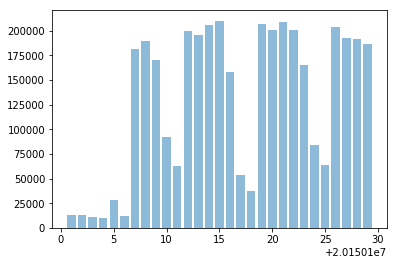

In [46]:
import matplotlib.pyplot as plt

predicted = reg.predict(X_data)

plt.bar(X_flattened, Y_flattened, align='center', alpha=0.5)
plt.plot(X_flattened, )